# SARIMA

## Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
# Carregar o conjunto de dados
df = pd.read_csv('../data/commerce_dataset_clean.csv', sep=';')

In [8]:
# Converter a coluna 'dtme' para datetime e definir como índice do DataFrame
df['dtme'] = pd.to_datetime(df['dtme'])
df.set_index('dtme', inplace=True)

## SARIMA

In [9]:
# Aggregate sales data by day
daily_sales = df['total'].resample('D').sum()

# Split the data into 20% training and 80% testing
split_point = int(len(daily_sales) * 0.2)
train_data, test_data = daily_sales[:split_point], daily_sales[split_point:]

# Define new SARIMA parameters
p, d, q = 2, 1, 2  # Non-seasonal components
P, D, Q, m = 1, 1, 2, 7  # Seasonal components

# Initialize and fit the SARIMA model
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()

# Forecast on the test dataset
forecast = model_fit.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# Summary of the model
model_fit.summary()

/Users/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30791D+15    |proj g|=  8.15705D+19

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     14      1     0     0   2.769D+11   1.704D+09
  F =   1704163242.1446819     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                   17
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 7)   Log Likelihood        -28970775116.460
Date:                           Mon, 26 Feb 2024   AIC                    57941550248.919
Time:                                   17:03:08   BIC                    57941550250.497
Sample:                               01-01-2019   HQIC                   57941550245.514
                                    - 01-17-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4220   1.41e-08  -1.01e+08      0.000      -1.422      -1.422
ar.L2         -0.5767   1.22e-08  -4.72e+07      0.000      -0.577      -0.577
ma.L1      -1.223e-07   1.25e-08     -9.766      0.000   -1.47e-07   -9.78e-08
ma.L2      -1.231e-07   5.05e-09    -24.383      0.000   -1.33e-07   -1.13e-07
ar.S.L7     8.661e-09   1.11e-08      0.781      0.435   -1.31e-08    3.04e-08
ma.S.L7     8.665e-09   1.11e-08      0.781      0.435   -1.31e-08    3.04e-08
ma.S.L14    1.744e-09   4.97e-08      0.035      0.972   -9.56e-08    9.91e-08
sigma2         0.0002   4.56e-14   3.32e+09      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.75   Prob(JB):                         0.75
Heteroskedasticity (H):               7.25   Skew:                            -0.21
Prob(H) (two-sided):                  0.14   Kurtosis:                         1.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.62e+17. Standard errors may be unstable.
"""

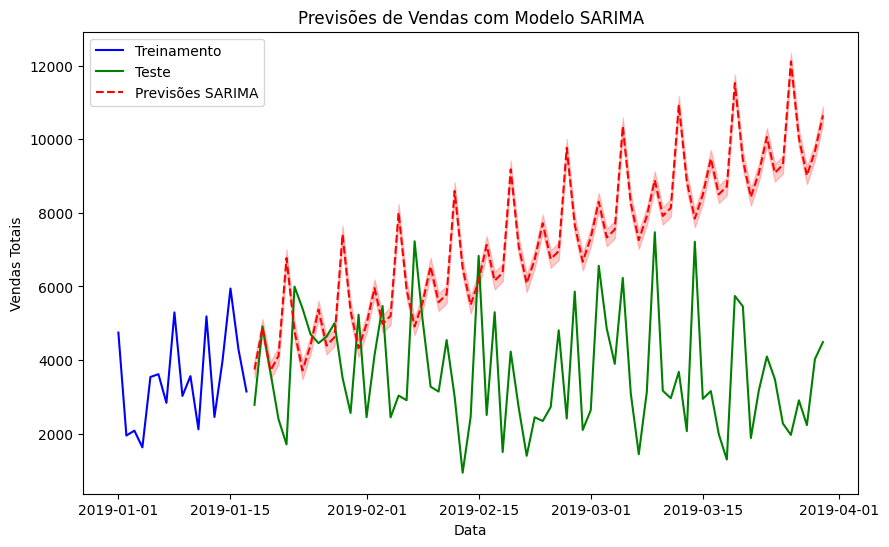

In [10]:
# Realizar previsões com o modelo ajustado
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

# Plotar os dados reais e as previsões
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Treinamento', color='blue')
plt.plot(test_data.index, test_data, label='Teste', color='green')
plt.plot(predictions.index, predictions, label='Previsões SARIMA', color='red', linestyle='--')
plt.fill_between(predictions.index, predictions - predictions.sem(), predictions + predictions.sem(), color='red', alpha=0.2)
plt.legend()
plt.title('Previsões de Vendas com Modelo SARIMA')
plt.xlabel('Data')
plt.ylabel('Vendas Totais')
plt.show()